In [8]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score
from statsmodels.stats.outliers_influence import variance_inflation_factor


#### 1. Problem Statement

##### 2. Data Gathering

In [17]:
df=pd.read_csv('fish.csv')
df

,Species,Weight,Length1,Length2,Length3,Height,Width
0,Bream,242.0,23.2,25.4,30.0,11.5200,4.0200
1,Bream,290.0,24.0,26.3,31.2,12.4800,4.3056
2,Bream,340.0,23.9,26.5,31.1,12.3778,4.6961
3,Bream,363.0,26.3,29.0,33.5,12.7300,4.4555
4,Bream,430.0,26.5,29.0,34.0,12.4440,5.1340
...,...,...,...,...,...,...,...
154,Smelt,12.2,11.5,12.2,13.4,2.0904,1.3936
155,Smelt,13.4,11.7,12.4,13.5,2.4300,1.2690
156,Smelt,12.2,12.1,13.0,13.8,2.2770,1.2558
157,Smelt,19.7,13.2,14.3,15.2,2.8728,2.0672


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 159 entries, 0 to 158
Data columns (total 7 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Species  159 non-null    object 
 1   Weight   159 non-null    float64
 2   Length1  159 non-null    float64
 3   Length2  159 non-null    float64
 4   Length3  159 non-null    float64
 5   Height   159 non-null    float64
 6   Width    159 non-null    float64
dtypes: float64(6), object(1)
memory usage: 8.8+ KB


##### 3. EDA

In [11]:
df['Species'].value_counts()

Species
Perch        56
Bream        35
Roach        20
Pike         17
Smelt        14
Parkki       11
Whitefish     6
Name: count, dtype: int64

In [18]:
df=pd.get_dummies(df,columns=['Species'],dtype='int')

In [19]:
df

,Weight,Length1,Length2,Length3,Height,Width,Species_Bream,Species_Parkki,Species_Perch,Species_Pike,Species_Roach,Species_Smelt,Species_Whitefish
0,242.0,23.2,25.4,30.0,11.5200,4.0200,1,0,0,0,0,0,0
1,290.0,24.0,26.3,31.2,12.4800,4.3056,1,0,0,0,0,0,0
2,340.0,23.9,26.5,31.1,12.3778,4.6961,1,0,0,0,0,0,0
3,363.0,26.3,29.0,33.5,12.7300,4.4555,1,0,0,0,0,0,0
4,430.0,26.5,29.0,34.0,12.4440,5.1340,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
154,12.2,11.5,12.2,13.4,2.0904,1.3936,0,0,0,0,0,1,0
155,13.4,11.7,12.4,13.5,2.4300,1.2690,0,0,0,0,0,1,0
156,12.2,12.1,13.0,13.8,2.2770,1.2558,0,0,0,0,0,1,0
157,19.7,13.2,14.3,15.2,2.8728,2.0672,0,0,0,0,0,1,0


##### 4. Feature Engineering

##### 5. Feature Selsection

In [24]:
df.corr().iloc[:,0]

Weight               1.000000
Length1              0.915712
Length2              0.918618
Length3              0.923044
Height               0.724345
Width                0.886507
Species_Bream        0.326795
Species_Parkki      -0.186034
Species_Perch       -0.033240
Species_Pike         0.310641
Species_Roach       -0.261784
Species_Smelt       -0.337109
Species_Whitefish    0.073625
Name: Weight, dtype: float64

<Axes: >

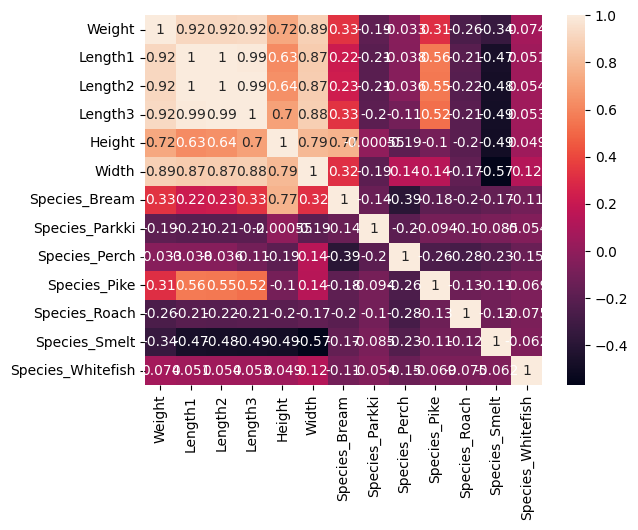

In [26]:
sns.heatmap(df.corr(),annot=True)

##### VIF

In [29]:
x=df.drop('Weight',axis=1)
x

,Length1,Length2,Length3,Height,Width,Species_Bream,Species_Parkki,Species_Perch,Species_Pike,Species_Roach,Species_Smelt,Species_Whitefish
0,23.2,25.4,30.0,11.5200,4.0200,1,0,0,0,0,0,0
1,24.0,26.3,31.2,12.4800,4.3056,1,0,0,0,0,0,0
2,23.9,26.5,31.1,12.3778,4.6961,1,0,0,0,0,0,0
3,26.3,29.0,33.5,12.7300,4.4555,1,0,0,0,0,0,0
4,26.5,29.0,34.0,12.4440,5.1340,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
154,11.5,12.2,13.4,2.0904,1.3936,0,0,0,0,0,1,0
155,11.7,12.4,13.5,2.4300,1.2690,0,0,0,0,0,1,0
156,12.1,13.0,13.8,2.2770,1.2558,0,0,0,0,0,1,0
157,13.2,14.3,15.2,2.8728,2.0672,0,0,0,0,0,1,0


In [30]:
x.values

array([[23.2, 25.4, 30. , ...,  0. ,  0. ,  0. ],
       [24. , 26.3, 31.2, ...,  0. ,  0. ,  0. ],
       [23.9, 26.5, 31.1, ...,  0. ,  0. ,  0. ],
       ...,
       [12.1, 13. , 13.8, ...,  0. ,  1. ,  0. ],
       [13.2, 14.3, 15.2, ...,  0. ,  1. ,  0. ],
       [13.8, 15. , 16.2, ...,  0. ,  1. ,  0. ]])

In [31]:
VIF_list=[]
for i in range(0,x.shape[1]):
    vif=variance_inflation_factor(x,i)
    VIF_list.append(vif)
print('VIF_List:',VIF_list)
    

VIF_List: [2360.4250820913658, 4307.918108946514, 2076.9371503891552, 56.203701550579964, 29.1665054646116, 64.20766253479916, 5.539718159696336, 9.945708676454426, 16.57204402107398, 6.880800028157697, 2.092897755186898, 3.1127373678978114]


In [32]:
y=df['Weight']
y

0      242.0
1      290.0
2      340.0
3      363.0
4      430.0
       ...  
154     12.2
155     13.4
156     12.2
157     19.7
158     19.9
Name: Weight, Length: 159, dtype: float64

##### 6. Model Training

In [33]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=10)

In [34]:
lin_reg=LinearRegression()

In [35]:
lin_reg.fit(x_train,y_train)

LinearRegression()

In [36]:
y_pred_test=lin_reg.predict(x_test)

In [37]:
y_pred_train=lin_reg.predict(x_train)

##### 7. Model Evaluation

In [38]:
residual_test=y_test-y_pred_test
residual_test

35     247.454545
85     -35.413895
47      63.693980
24     -29.058038
129    -23.796176
95     -61.071181
128    -15.484608
10     -53.767781
58      20.283033
104    -94.943409
69     -99.159651
63      46.379815
39     117.317906
20     -75.197404
38      62.355777
151      3.977900
101    -68.970309
1      -41.541178
67     -25.038565
99    -102.036490
19      59.311558
97    -101.326203
157    -89.209952
102    -52.424715
21      44.869629
43      48.360978
83     -39.821400
56    -101.737354
134   -131.613249
147     58.126442
87     -59.408664
70    -117.032259
Name: Weight, dtype: float64

In [39]:
residual_train=y_train-y_pred_train
residual_train

124      7.816584
49     -15.187733
68     -89.958780
2        0.982802
59      67.589384
          ...    
113     34.802119
64       9.008024
15      34.813374
125    113.810026
9       -3.052077
Name: Weight, Length: 127, dtype: float64

In [40]:
mse_test=mean_squared_error(y_test,y_pred_test)
mse_test

6742.9691028228135

In [41]:
rmse_test=np.sqrt(mse_test)
rmse_test

82.11558380004865

In [42]:
mae_test=mean_absolute_error(y_test,y_pred_test)
mae_test

68.44325136703895

In [43]:
r2_test=r2_score(y_test,y_pred_test)
r2_test

0.8241603153034741

###### Training Data Evaluation

In [44]:
mse_train=mean_squared_error(y_train,y_pred_train)
mse_train

8782.012964848993

In [45]:
rmse_train=np.sqrt(mse_train)
rmse_train

93.7123949371106

In [46]:
mae_train=mean_absolute_error(y_train,y_pred_train)
mae_train

70.17322757273338

In [47]:
r2_train=r2_score(y_train,y_pred_train)
r2_train

0.9386500419713846

##### Normality of residual

##### kdeplot

<Axes: xlabel='Weight', ylabel='Density'>

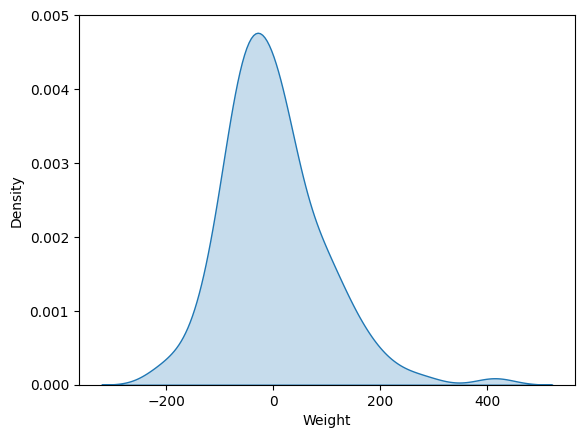

In [49]:
sns.kdeplot(residual_train,fill=True)

###### Histplot

<Axes: xlabel='Weight', ylabel='Count'>

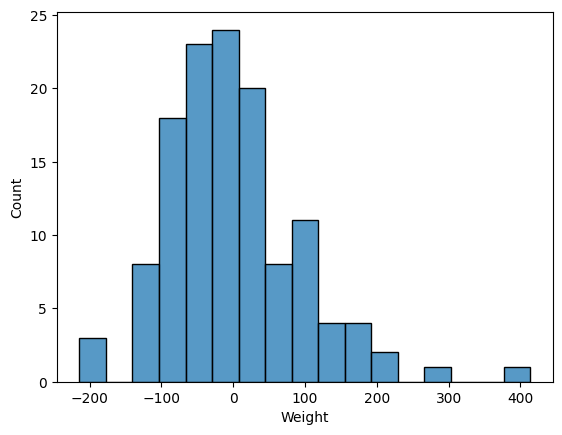

In [50]:
sns.histplot(residual_train)

###### displot

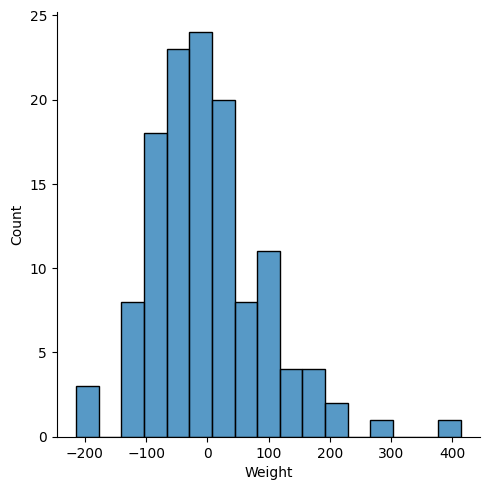

In [51]:
sns.displot(residual_train)

###### Q-Q plot

In [52]:
import statsmodels.api as sm

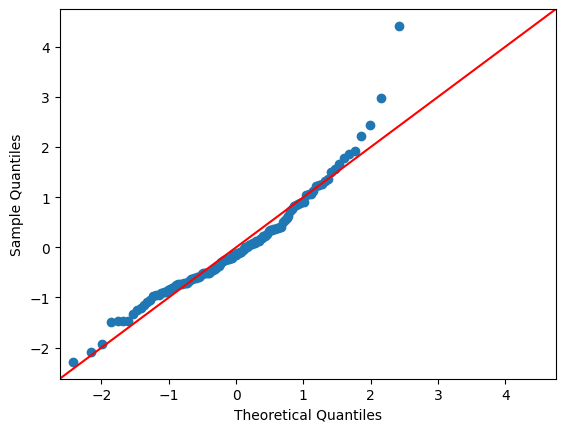

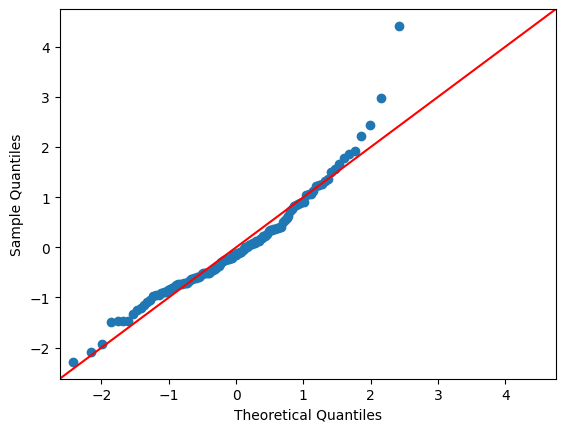

In [53]:
sm.qqplot(residual_train,line='45',fit=True)

###### Hypothesis Testing

###### 1. Shapiro

In [54]:
from scipy.stats import shapiro

In [56]:
stats,p_value=shapiro(residual_train)
print(stats)
print(p_value)
if p_value<0.05:
    print('Residuals are normally distributed')
else:
    print('Residuals are not normally distributed')

0.9497861266136169
0.00013224697613622993
Residuals are normally distributed


###### 2. kstets

In [57]:
from scipy.stats import kstest

In [59]:
stats,p_value=kstest(residual_train,'norm')
print(stats)
print(p_value)
if p_value<0.05:
    print('Residuals are normally distributed')
else:
    print('Residuals are not normally distributed')

0.5500447832901202
1.302342984730437e-36
Residuals are normally distributed


###### 3. Normal Test

In [60]:
from scipy.stats import normaltest

In [61]:
stats,p_value=normaltest(residual_train)
print(stats)
print(p_value)
if p_value<0.05:
    print('Residuals are normally distributed')
else:
    print('Residuals are not normally distributed')

28.99947511062321
5.044800433035845e-07
Residuals are normally distributed


###### Skewness

In [62]:
from scipy.stats import skew

In [63]:
skew(residual_train) # skew between 0.5 to -0.5 >> symmetric        0.5 to 1.0 >> positive skew   -0.5 to -1 >> negetive skew

0.9987584818257811

###### Homoscedasticity

Text(0, 0.5, 'Residual')

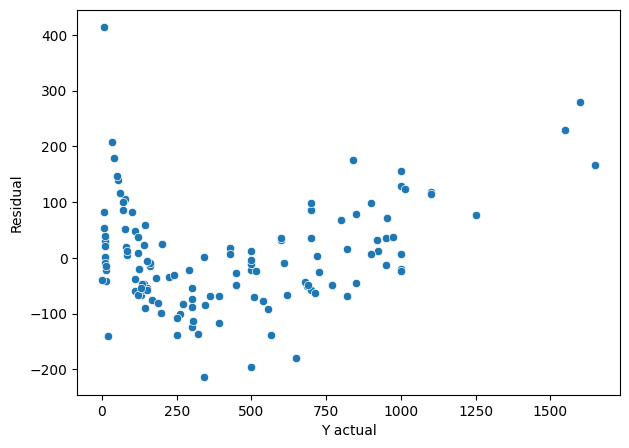

In [67]:
plt.figure(figsize=(7,5))
sns.scatterplot(x=y_train,y=residual_train)
plt.xlabel('Y actual')
plt.ylabel('Residual')


In [68]:
Species='Bream'
Length1=23.2
Length2=25.4
Length3=30
Height=11.52
Width=4.02


In [74]:
Column_list=x.columns.to_list()
Column_list

['Length1',
 'Length2',
 'Length3',
 'Height',
 'Width',
 'Species_Bream',
 'Species_Parkki',
 'Species_Perch',
 'Species_Pike',
 'Species_Roach',
 'Species_Smelt',
 'Species_Whitefish']

In [75]:
Species_name='Species_'+Species
Species_index=Column_list.index(Species_name)
Species_index

5

In [76]:
test_array=np.zeros([1,x.shape[1]])
test_array

array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.]])

In [77]:
test_array[0][0]=Length1
test_array[0][1]=Length2
test_array[0][2]=Length3
test_array[0][3]=Height
test_array[0][4]=Width
test_array[0][Species_index]=1

In [78]:
y_pred=lin_reg.predict(test_array)[0]
y_pred

C:\Users\Administrator\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


272.9502038302702

In [80]:
import pickle
import json

In [81]:
with open('linear_regression_fish.pkl','wb') as f:
    pickle.dump(lin_reg,f)

In [82]:
json_data={'Column_list':Column_list}

In [83]:
with open('json_data_fish.json','w') as f:
    json.dump(json_data,f)